In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
def get_vacancies(region, position, leves,position1):
    vacancies_data = []
    # Формирование URL для поиска вакансий
    url = f"https://hh.ru/search/vacancy?text={position}+{level}&area={region}"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
    }
    response = requests.get(url, headers=headers)

    # Парсинг страницы с помощью BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    soup = str(soup).lower()
    return soup.count(position1 + ' ' + level)

In [25]:
# записываем нужные нам данные
specialties = ["Data%20Analyst", "Data%20Scientist", "Data%20Engineer"]
specialties1 = ["data analyst", "data scientist", "data engineer"]
levels = ["junior", "middle", "senior"]
areas = ["1","2"] # МСК и СПБ
all_vacancies = dict()

In [26]:
# Записываем все найденные вакансии
k = 0
for specialty in specialties:
    for level in levels:
        for area in areas:
            vacancies = get_vacancies(area,specialty, level, specialties1[k])
            all_vacancies[specialties1[k]+'_' + level + '_' + area] = vacancies
    k+=1
    


In [27]:
# Создаем дф с вакансиями и сразу группир
df = pd.DataFrame(list(all_vacancies.items()),columns=['Position', 'Count'])
df[['Specialty', 'Level', 'Area']] = df['Position'].str.split('_', expand=True)
df

,Position,Count,Specialty,Level,Area
0,data analyst_junior_1,9,data analyst,junior,1
1,data analyst_junior_2,10,data analyst,junior,2
2,data analyst_middle_1,8,data analyst,middle,1
3,data analyst_middle_2,8,data analyst,middle,2
4,data analyst_senior_1,8,data analyst,senior,1
5,data analyst_senior_2,8,data analyst,senior,2
6,data scientist_junior_1,8,data scientist,junior,1
7,data scientist_junior_2,8,data scientist,junior,2
8,data scientist_middle_1,16,data scientist,middle,1
9,data scientist_middle_2,8,data scientist,middle,2


In [28]:
#Создаем кростаблицу
pivot_table = pd.pivot_table(df, values='Count', index=['Specialty', 'Level'], columns='Area', fill_value=0)
pivot_table

Area                      1     2
Specialty      Level             
data analyst   junior   9.0  10.0
               middle   8.0   8.0
               senior   8.0   8.0
data engineer  junior   8.0   8.0
               middle  12.0   8.0
               senior   8.0   8.0
data scientist junior   8.0   8.0
               middle  16.0   8.0
               senior   8.0   8.0

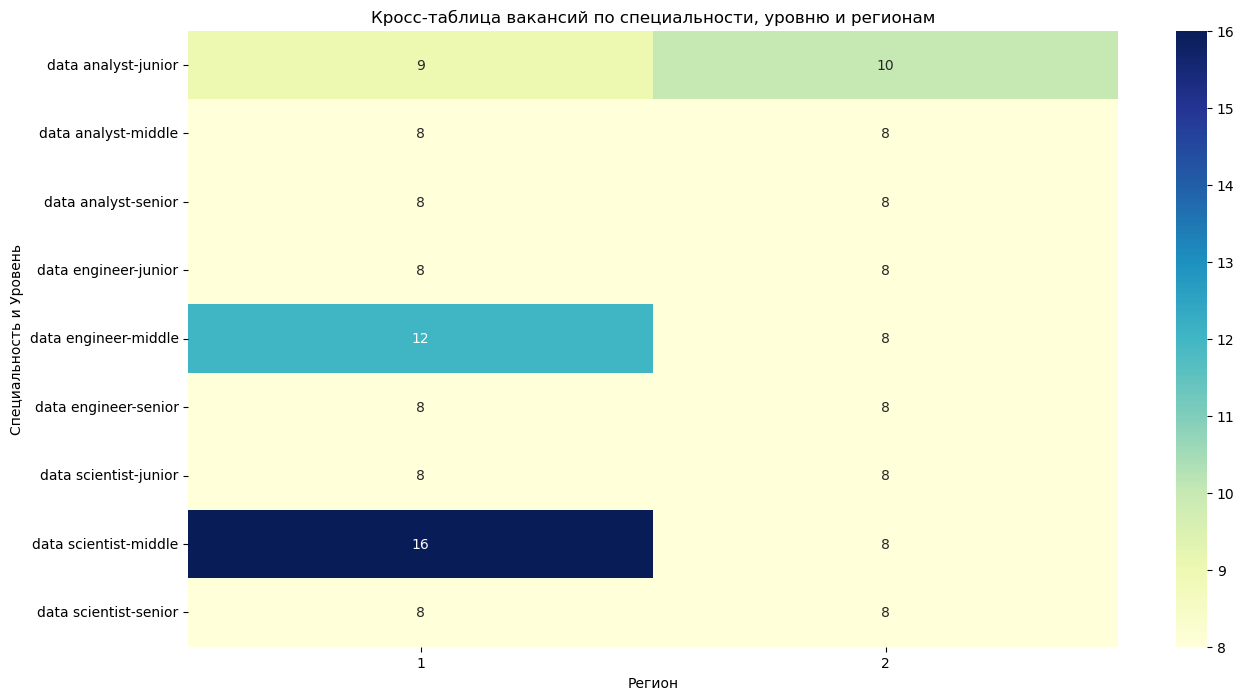

In [29]:
#строим тепловую карту
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Кросс-таблица вакансий по специальности, уровню и регионам')
plt.xlabel('Регион')
plt.ylabel('Специальность и Уровень')
plt.show()